<img src="NVIDIA.png" style="width:1200px; height:400px"/>

# NVIDIA Stock Market Analysis 

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import time
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('NVDA.CSV')

# What is the total number of records in the dataset?

In [7]:
# Get the total number of records
total_records = df.shape[0]
print("Total number of records:", total_records)


Total number of records: 6558


# What is the date range covered in the dataset (earliest and latest date)?

In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Get the earliest and latest dates
earliest_date = df['Date'].min()
latest_date = df['Date'].max()

print("Earliest date:", earliest_date)
print("Latest date:", latest_date)


Earliest date: 1999-01-22 00:00:00
Latest date: 2025-02-14 00:00:00


# What are the column names and their data types?

In [11]:
# Display column names and their data types
print(df.dtypes)

Date         datetime64[ns]
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
dtype: object


# What is the highest and lowest closing price in the dataset?

In [13]:
# Get the highest and lowest closing price
highest_close = df['Close'].max()
lowest_close = df['Close'].min()

print("Highest closing price:",highest_close)
print("Lowest closing price",lowest_close)

Highest closing price: 149.4299927
Lowest closing price 0.034115002


# How many missing values exist in each column?

In [15]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


# What is the moving average of the closing price for a 7-day and 30-day window?

In [17]:
# Calculate the 7-day and 30-day moving averages for the closing price
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

# Display the last few rows to check the moving averages
print(df[['Date', 'Close', 'MA_7', 'MA_30']].tail())


           Date       Close        MA_7       MA_30
6553 2025-02-10  133.570007  124.614286  133.846667
6554 2025-02-11  132.800003  126.432858  133.609000
6555 2025-02-12  131.139999  128.501429  133.413334
6556 2025-02-13  135.289993  130.878571  133.340000
6557 2025-02-14  138.850006  132.881428  133.492001


# Identify the top 5 highest trading volume days.

In [19]:
# Get the top 5 days with the highest trading voiume
top_5_volume_days = df.nlargest(5,'Volume')[['Date','Volume','Close']]
print ("Top 5 highest trading volume days:\n", top_5_volume_days)


Top 5 highest trading volume days:
            Date      Volume     Close
1079 2003-05-09  9230856000  0.178083
717  2001-11-29  5135472000  0.446750
1392 2004-08-06  5088948000  0.078583
884  2002-07-31  4837140000  0.092250
1206 2003-11-07  4292820000  0.181250


# Plot the closing price trend over time.

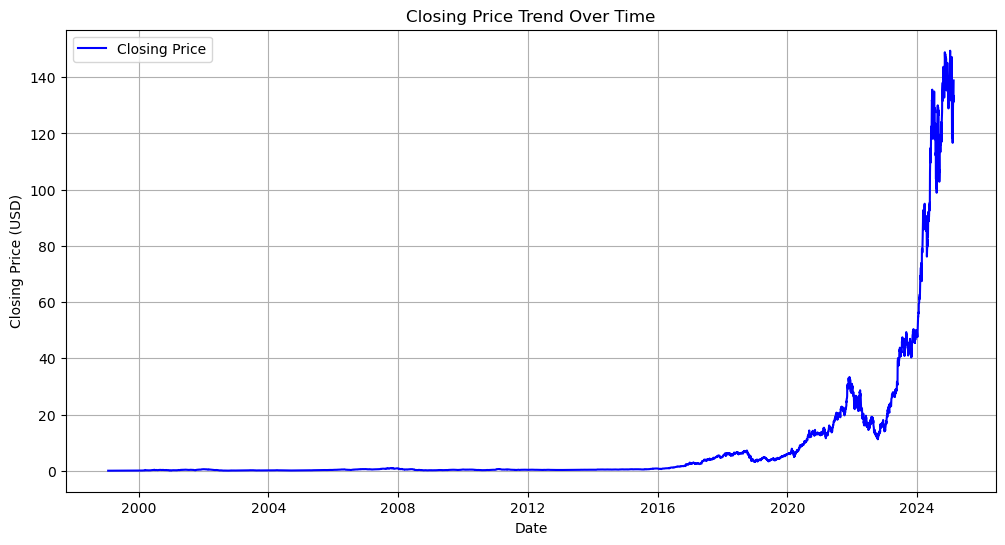

In [21]:
# plot closing price trend over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Closing Price Trend Over Time')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Calculate the daily return percentage and plot the histogram of returns.

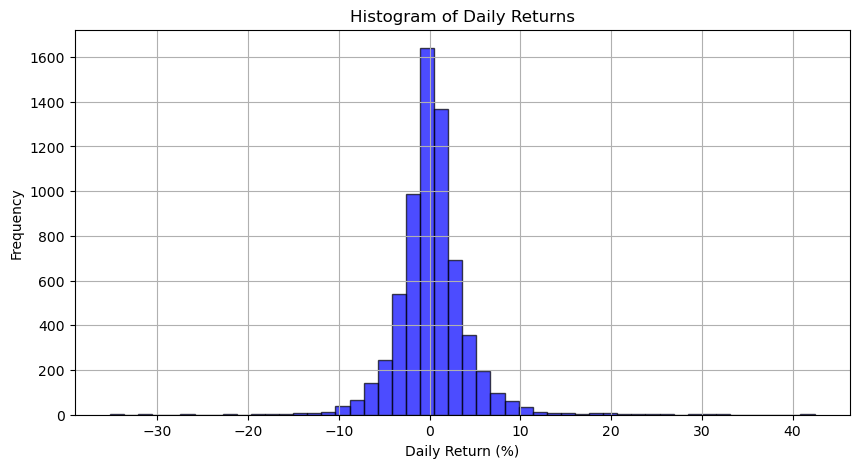

In [23]:
# Calculate daily return percentage
df['Daily_Return'] = df['Close'].pct_change() * 100

# Plot the histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(df['Daily_Return'].dropna(), bins=50, color='blue', alpha=0.7, edgecolor='black')

# Formatting the plot
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.grid()

# Show the plot
plt.show()


# Determine the month with the highest average closing price.

In [25]:
# Extract year and month from the Date column
df['Year-Month'] = df['Date'].dt.to_period('M')

# Calculate the average closing price per month
monthly_avg_close = df.groupby('Year-Month')['Close'].mean()

# Find the month with the highest average closing price
highest_avg_month = monthly_avg_close.idxmax()
highest_avg_price = monthly_avg_close.max()

print("Month with the highest average closing price:", highest_avg_month)
print("Highest average closing price:", highest_avg_price)


Month with the highest average closing price: 2024-11
Highest average closing price: 142.51199875499998


# Identify and visualize trends using a rolling mean and Bollinger Bands

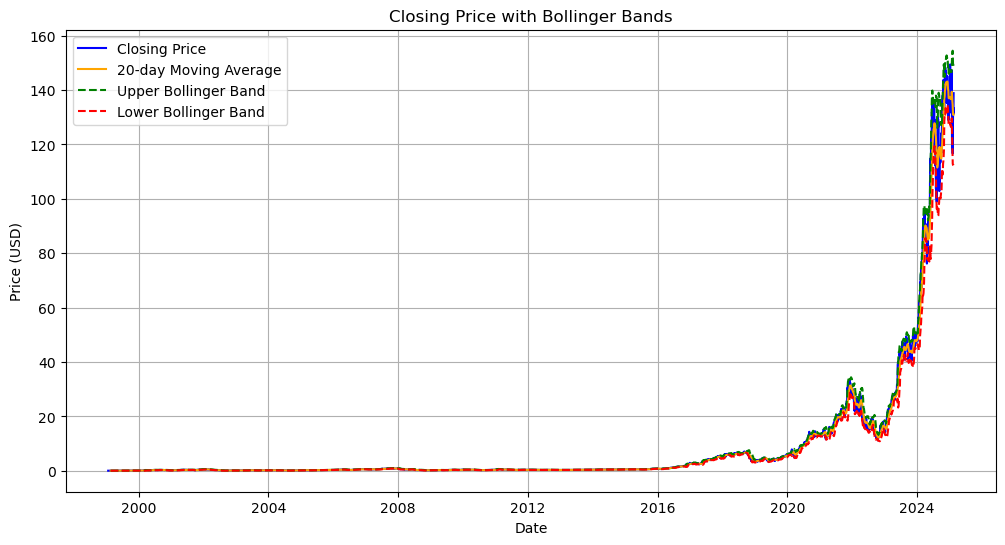

In [27]:
# Calculate rolling mean (20-day moving average) and Bollinger Bands
df['Rolling_Mean'] = df['Close'].rolling(window=20).mean()
df['Upper_Band'] = df['Rolling_Mean'] + (df['Close'].rolling(window=20).std() * 2)
df['Lower_Band'] = df['Rolling_Mean'] - (df['Close'].rolling(window=20).std() * 2)

# Plot Closing Price and Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['Rolling_Mean'], label='20-day Moving Average', color='orange')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Bollinger Band', color='green', linestyle='dashed')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Bollinger Band', color='red', linestyle='dashed')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Closing Price with Bollinger Bands')
plt.legend()
plt.grid()

# Show the plot
plt.show()


# Calculate and plot the correlation between trading volume and price movements.

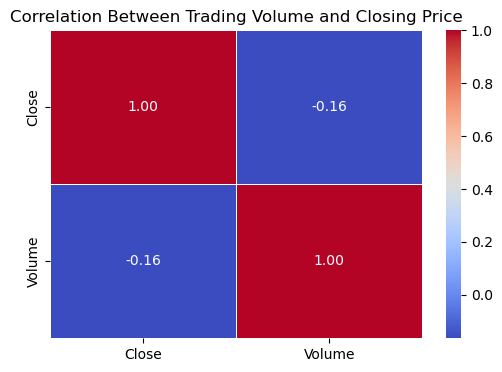

In [29]:
# Calculate the correlation matrix
correlation_matrix = df[['Close', 'Volume']].corr()

# Plot a heatmap of the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Formatting the plot
plt.title('Correlation Between Trading Volume and Closing Price')

# Show the plot
plt.show()


# Implement a simple moving average crossover strategy (e.g., compare 50-day and 200-day moving averages).

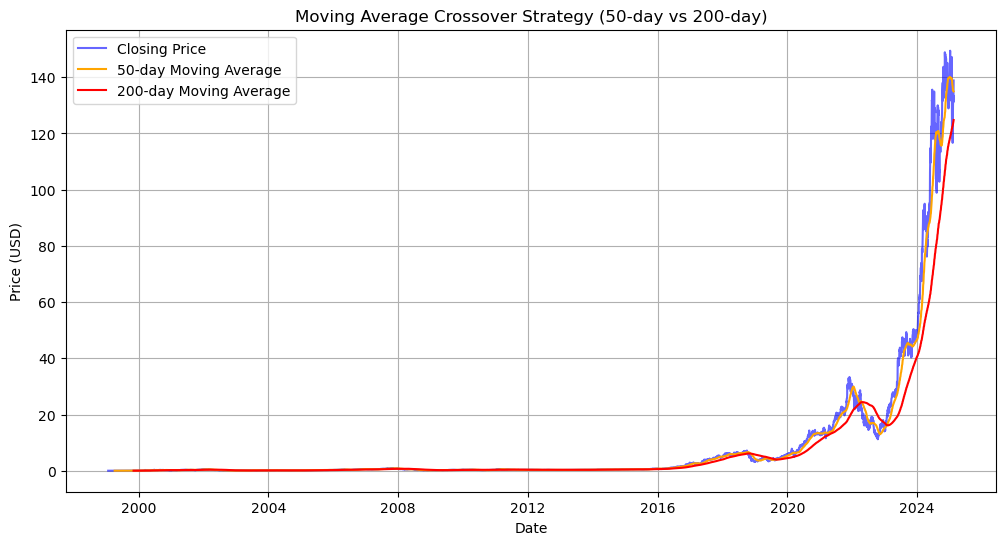

In [31]:
# Calculate 50-day and 200-day moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Plot the closing price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['MA_50'], label='50-day Moving Average', color='orange')
plt.plot(df['Date'], df['MA_200'], label='200-day Moving Average', color='red')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Moving Average Crossover Strategy (50-day vs 200-day)')
plt.legend()
plt.grid()

# Show the plot
plt.show()


# Detect outliers in stock prices using the IQR method or Z-score.

# IQR Method

In [33]:
# Calculate IQR (Interquartile Range)
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

print("Number of outliers detected:", len(outliers))
print(outliers[['Date', 'Close']])


Number of outliers detected: 1138
           Date       Close
5418 2020-08-04   11.227750
5419 2020-08-05   11.286750
5420 2020-08-06   11.335500
5421 2020-08-07   11.199500
5424 2020-08-12   11.440250
...         ...         ...
6553 2025-02-10  133.570007
6554 2025-02-11  132.800003
6555 2025-02-12  131.139999
6556 2025-02-13  135.289993
6557 2025-02-14  138.850006

[1138 rows x 2 columns]


# Z-score Method

In [35]:
# Compute Z-scores for closing price
df['Z_Score'] = zscore(df['Close'])

# Define threshold for outliers (e.g., abs(Z-score) > 3)
outliers_z = df[abs(df['Z_Score']) > 3]

print("Number of outliers detected using Z-score:", len(outliers_z))
print(outliers_z[['Date', 'Close', 'Z_Score']])


Number of outliers detected using Z-score: 238
           Date       Close   Z_Score
6317 2024-03-01   82.278999  3.074232
6318 2024-03-04   85.237000  3.197982
6319 2024-03-05   85.963997  3.228396
6320 2024-03-06   88.699997  3.342859
6321 2024-03-07   92.668999  3.508904
...         ...         ...       ...
6553 2025-02-10  133.570007  5.220025
6554 2025-02-11  132.800003  5.187811
6555 2025-02-12  131.139999  5.118364
6556 2025-02-13  135.289993  5.291981
6557 2025-02-14  138.850006  5.440917

[238 rows x 3 columns]


# Perform a time series decomposition to analyze trends, seasonality, and residuals.

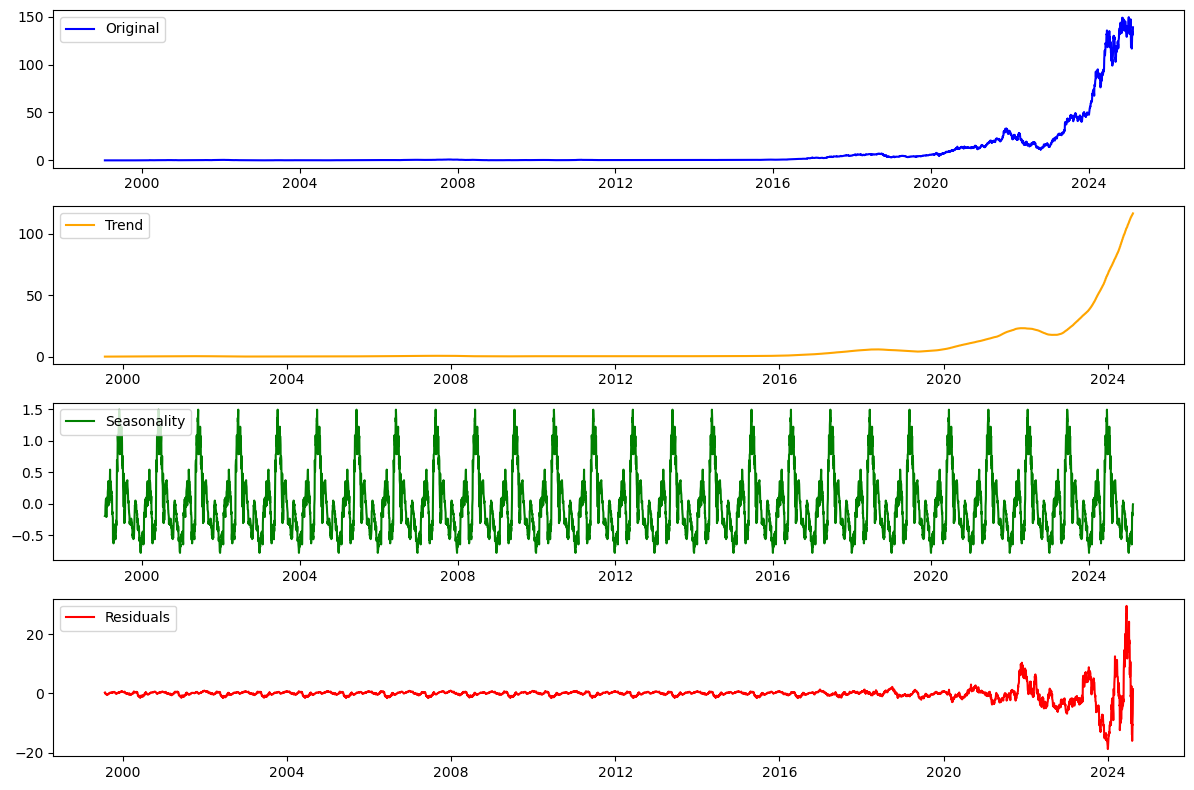

In [37]:
# Perform time series decomposition (using 'Close' price)
df.set_index('Date', inplace=True)  # Set Date as index for decomposition
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)  # Assuming ~252 trading days in a year

# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


# 📌 Stock Performance & Trends

# What is the overall trend of NVIDIA’s stock price over the last 5 years? (Use line charts and moving averages)

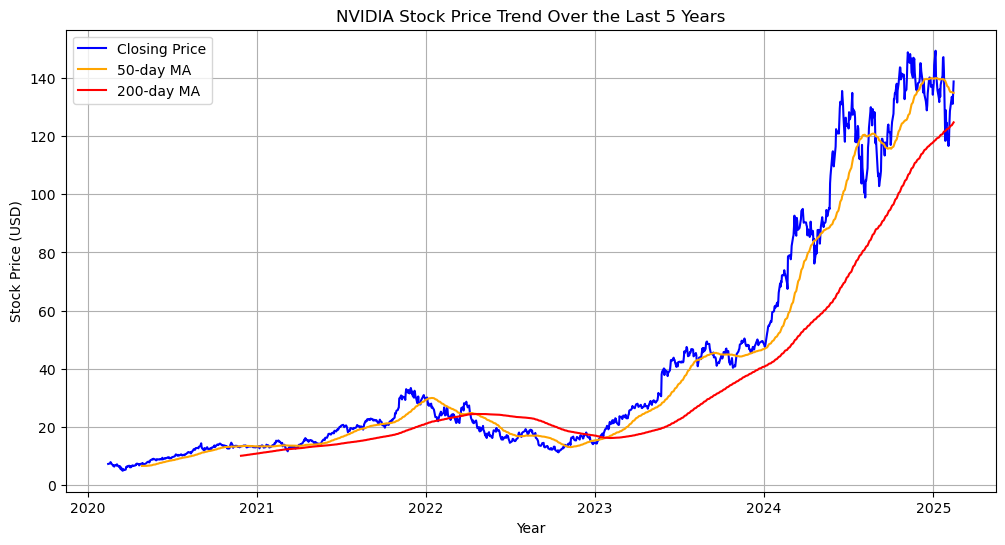

In [39]:
# Filter data for the last 5 years
five_years_ago = df.index.max() - pd.DateOffset(years=5)
df_last_5_years = df[df.index >= five_years_ago]

# Calculate moving averages (50-day and 200-day)
df_last_5_years['MA_50'] = df_last_5_years['Close'].rolling(window=50).mean()
df_last_5_years['MA_200'] = df_last_5_years['Close'].rolling(window=200).mean()

# Plot stock price trend
plt.figure(figsize=(12, 6))
plt.plot(df_last_5_years.index, df_last_5_years['Close'], label='Closing Price', color='blue')
plt.plot(df_last_5_years.index, df_last_5_years['MA_50'], label='50-day MA', color='orange')
plt.plot(df_last_5_years.index, df_last_5_years['MA_200'], label='200-day MA', color='red')

# Formatting
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.title('NVIDIA Stock Price Trend Over the Last 5 Years')
plt.legend()
plt.grid()

# Show the plot
plt.show()


# What were the highest and lowest closing prices in the dataset? (Use min/max functions)

In [41]:
highest_price = df['Close'].max()
lowest_price = df['Close'].min()
highest_date = df[df['Close'] == highest_price].index[0]
lowest_date = df[df['Close'] == lowest_price].index[0]

print(f"Highest Closing Price: ${highest_price:.2f} on {highest_date}")
print(f"Lowest Closing Price: ${lowest_price:.2f} on {lowest_date}")


Highest Closing Price: $149.43 on 2025-01-06 00:00:00
Lowest Closing Price: $0.03 on 1999-04-26 00:00:00


# What is the average monthly return of NVIDIA’s stock? (Use groupby with resampling)

In [43]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Resample data to monthly frequency and calculate average monthly return
monthly_avg_return = df['Daily_Return'].resample('M').mean() * 100

print("Average Monthly Returns (%):")
print(monthly_avg_return.tail(12))  # Display last 12 months


Average Monthly Returns (%):
Date
2024-03-31    0.710117
2024-04-30   -0.139854
2024-05-31    1.135960
2024-06-30    0.684005
2024-07-31   -0.151155
2024-08-31    0.172563
2024-09-30    0.148537
2024-10-31    0.418894
2024-11-30    0.231158
2024-12-31   -0.117510
2025-01-31   -0.413333
2025-02-28    1.490229
Freq: ME, Name: Daily_Return, dtype: float64


# Is there a pattern in stock performance before and after earnings announcements? (Check dates & compare returns)

In [45]:
# Example: Suppose we have a list of earnings announcement dates (You should replace these with actual earnings dates)
earnings_dates = pd.to_datetime([
    '2023-02-22', '2023-05-24', '2023-08-23', '2023-11-21',
    '2022-02-16', '2022-05-25', '2022-08-24', '2022-11-16'
])

# Define a window of 5 days before and after earnings
window = 5
returns_before = []
returns_after = []

for date in earnings_dates:
    if date in df.index:
        before = df.loc[date - pd.DateOffset(days=window): date - pd.DateOffset(days=1), 'Daily_Return'].mean()
        after = df.loc[date + pd.DateOffset(days=1): date + pd.DateOffset(days=window), 'Daily_Return'].mean()
        returns_before.append(before)
        returns_after.append(after)

# Convert to DataFrame for comparison
earnings_analysis = pd.DataFrame({
    'Earnings_Date': earnings_dates[:len(returns_before)],  # Ensure alignment
    'Avg_Return_Before (%)': [r * 100 for r in returns_before],
    'Avg_Return_After (%)': [r * 100 for r in returns_after]
})

print("Stock Performance Around Earnings:")
print(earnings_analysis)


Stock Performance Around Earnings:
  Earnings_Date  Avg_Return_Before (%)  Avg_Return_After (%)
0    2023-02-22              -3.108906              4.449110
1    2023-05-24              -1.051227             13.456539
2    2023-08-23               1.867243             -0.184203
3    2023-11-21               1.032249             -2.194152
4    2022-02-16               1.082777             -5.544364
5    2022-05-25              -1.897331              5.269191
6    2022-08-24              -2.875023             -2.679502
7    2022-11-16               1.914757             -1.257016


# 📌 Volatility & Risk Analysis

# What is the standard deviation of daily returns, and how volatile is NVIDIA’s stock? (Use .pct_change() and .std())

In [47]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Compute standard deviation of daily returns
std_dev = df['Daily_Return'].std() * 100  # Convert to percentage

print(f"Standard Deviation of Daily Returns: {std_dev:.2f}%")


Standard Deviation of Daily Returns: 3.78%


# How often does NVIDIA experience extreme price swings? (Detect outliers using boxplots or Z-score)

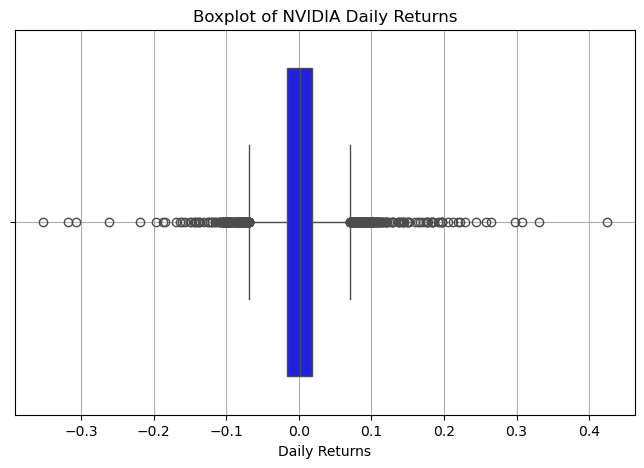

In [49]:
# Create a boxplot for daily returns
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Daily_Return'], color='blue')

# Formatting
plt.xlabel('Daily Returns')
plt.title('Boxplot of NVIDIA Daily Returns')
plt.grid()

# Show the plot
plt.show()


# 📌 Trading Insights & Investment Strategy

# Does a high trading volume indicate a major price movement? (Check correlation between volume & returns)

In [51]:
# Compute correlation between daily returns and trading volume
correlation = df[['Daily_Return', 'Volume']].corr()

print("Correlation between Trading Volume and Daily Returns:")
print(correlation)


Correlation between Trading Volume and Daily Returns:
              Daily_Return    Volume
Daily_Return      1.000000  0.054847
Volume            0.054847  1.000000


# Scatter Plot for Visualization

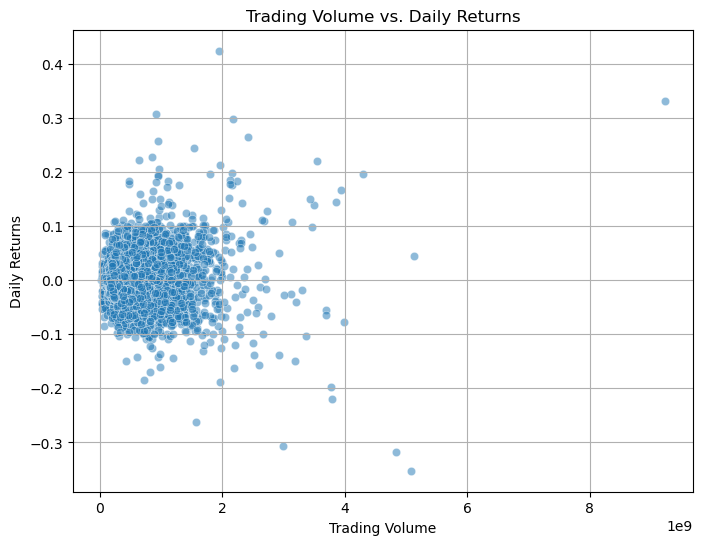

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Volume'], y=df['Daily_Return'], alpha=0.5)

plt.xlabel("Trading Volume")
plt.ylabel("Daily Returns")
plt.title("Trading Volume vs. Daily Returns")
plt.grid()
plt.show()


# What is the best time of year to invest in NVIDIA stock based on historical returns? (Analyze seasonal trends using .groupby())

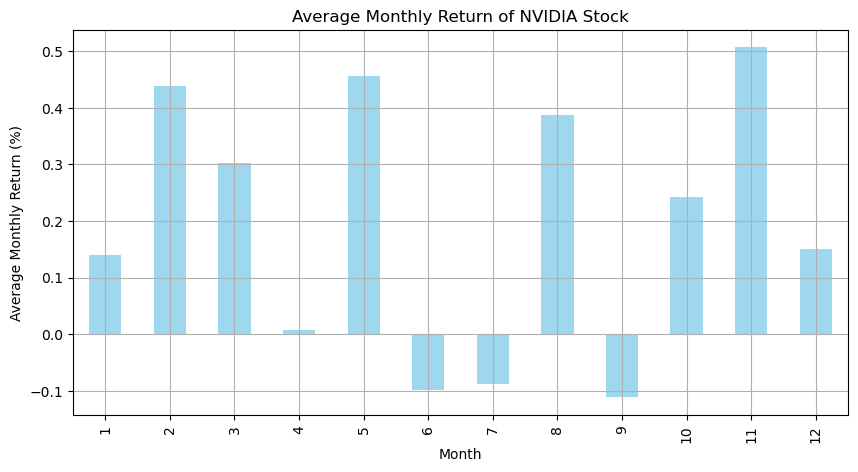

In [55]:
# Extract month from date
df['Month'] = df.index.month

# Compute average monthly return
monthly_avg = df.groupby('Month')['Daily_Return'].mean() * 100  # Convert to percentage

# Plot monthly trends
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue', alpha=0.8)

plt.xlabel("Month")
plt.ylabel("Average Monthly Return (%)")
plt.title("Average Monthly Return of NVIDIA Stock")
plt.grid()
plt.show()


# Can a Simple Moving Average (SMA) crossover strategy help identify buy/sell signals? (Implement 50-day & 200-day SMA strategy)

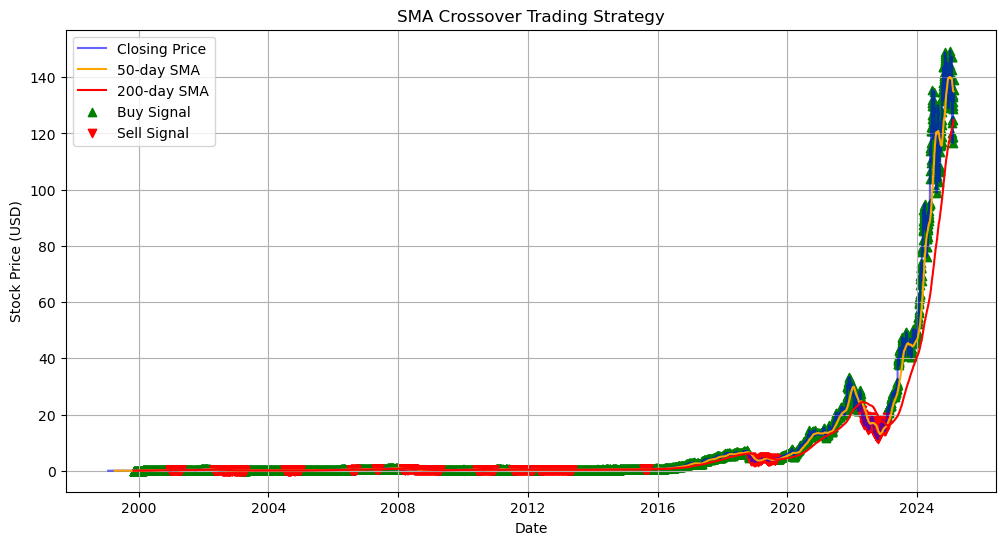

In [57]:
# Calculate 50-day and 200-day moving averages
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Identify buy/sell signals
df['Signal'] = 0  # Default no signal
df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1  # Buy signal when 50-day crosses above 200-day
df.loc[df['SMA_50'] < df['SMA_200'], 'Signal'] = -1  # Sell signal when 50-day crosses below 200-day

# Plot closing price & moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df.index, df['SMA_50'], label='50-day SMA', color='orange')
plt.plot(df.index, df['SMA_200'], label='200-day SMA', color='red')

# Mark buy/sell points
plt.scatter(df.index[df['Signal'] == 1], df['Close'][df['Signal'] == 1], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(df.index[df['Signal'] == -1], df['Close'][df['Signal'] == -1], label='Sell Signal', marker='v', color='red', alpha=1)

# Formatting
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("SMA Crossover Trading Strategy")
plt.legend()
plt.grid()

# Show the plot
plt.show()


# 📌 External Factors & Market Impact

# How did NVIDIA’s stock react to major news events (e.g., AI breakthroughs, acquisitions)? (Compare price movements on key dates)

In [59]:
# Define major event dates (replace these with actual news dates)
event_dates = pd.to_datetime([
    '2023-05-24',  # AI breakthrough announcement
    '2022-09-13',  # Large acquisition
    '2021-11-30',  # GPU shortage peak
    '2020-10-20'   # Major earnings report
])

# Analyze stock performance before & after events
event_analysis = []

for date in event_dates:
    if date in df.index:
        before = df.loc[date - pd.DateOffset(days=5):date - pd.DateOffset(days=1), 'Close'].pct_change().mean() * 100
        after = df.loc[date + pd.DateOffset(days=1):date + pd.DateOffset(days=5), 'Close'].pct_change().mean() * 100
        event_analysis.append((date, before, after))

# Convert to DataFrame
event_df = pd.DataFrame(event_analysis, columns=['Event_Date', 'Avg_Return_Before (%)', 'Avg_Return_After (%)'])

print("Stock Performance Before & After Major Events:")
print(event_df)


Stock Performance Before & After Major Events:
  Event_Date  Avg_Return_Before (%)  Avg_Return_After (%)
0 2023-05-24              -0.923391              2.543443
1 2022-09-13               1.828964              0.282374
2 2021-11-30               5.945463             -1.131185
3 2020-10-20              -1.703116              0.252537


# What effect did the global chip shortage have on NVIDIA’s stock? (Analyze stock price during supply chain disruptions)

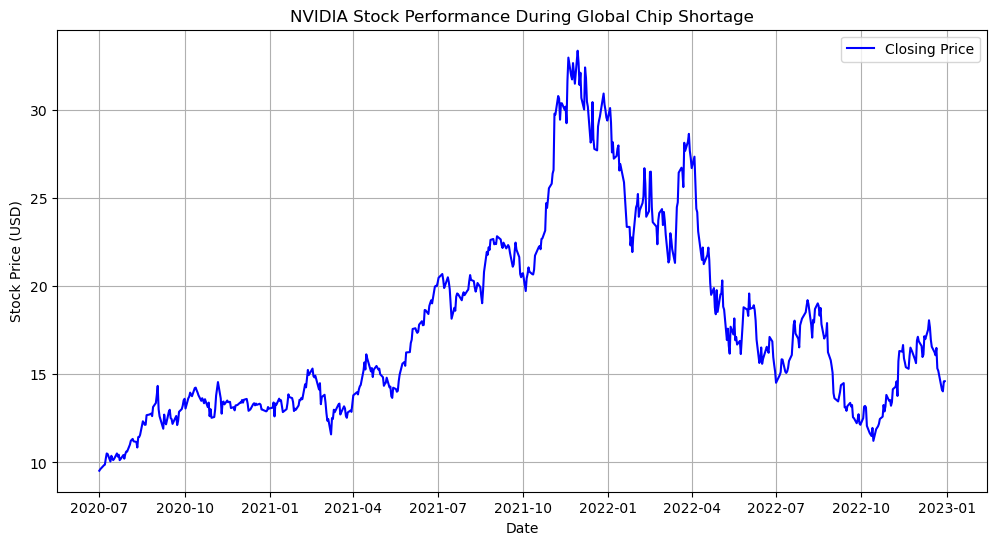

In [61]:
# Define chip shortage period
chip_shortage_start = '2020-07-01'
chip_shortage_end = '2022-12-31'

# Filter data for the period
chip_shortage_df = df.loc[chip_shortage_start:chip_shortage_end]

# Plot stock price during chip shortage
plt.figure(figsize=(12, 6))
plt.plot(chip_shortage_df.index, chip_shortage_df['Close'], label='Closing Price', color='blue')

# Formatting
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("NVIDIA Stock Performance During Global Chip Shortage")
plt.legend()
plt.grid()
plt.show()


In [135]:
# Calculate average returns before and during shortage
pre_shortage = df.loc[:chip_shortage_start, 'Close'].pct_change().mean() * 100
during_shortage = df.loc[chip_shortage_start:chip_shortage_end, 'Close'].pct_change().mean() * 100

print(f"Average Daily Return Before Shortage: {pre_shortage:.2f}%")
print(f"Average Daily Return During Shortage: {during_shortage:.2f}%")


Average Daily Return Before Shortage: 0.18%
Average Daily Return During Shortage: 0.12%


In [137]:
print(f"Start Date: {df.index.min()}")
print(f"End Date: {df.index.max()}")


Start Date: 1999-01-22 00:00:00
End Date: 2025-02-14 00:00:00


In [149]:
!pip install yfinance


# How does NVIDIA’s stock correlate with major indices like NASDAQ or S&P 500? (Use .corr() on stock data)

In [160]:
# Download NASDAQ & S&P 500 data
nasdaq = yf.download('^IXIC', start="2015-01-01", end="2024-01-01")
sp500 = yf.download('^GSPC', start="2015-01-01", end="2024-01-01")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [162]:
# Rename columns for clarity
nvda = nvda[['Close']].rename(columns={'Close': 'NVDA_Close'})
nasdaq = nasdaq[['Close']].rename(columns={'Close': 'NASDAQ_Close'})
sp500 = sp500[['Close']].rename(columns={'Close': 'SP500_Close'})


In [164]:
# Merge dataframes based on date index
df_combined = nvda.join([nasdaq, sp500], how='inner')

# Display first few rows
print(df_combined.head())


Price      NVDA_Close NASDAQ_Close  SP500_Close
Ticker           NVDA        ^IXIC        ^GSPC
Date                                           
2015-01-02   0.483143  4726.810059  2058.199951
2015-01-05   0.474983  4652.569824  2020.579956
2015-01-06   0.460582  4592.740234  2002.609985
2015-01-07   0.459382  4650.470215  2025.900024
2015-01-08   0.476663  4736.189941  2062.139893


In [166]:
# Compute correlation matrix
correlation_matrix = df_combined.corr()

# Display correlation values
print("Correlation of NVIDIA with NASDAQ and S&P 500:")
print(correlation_matrix)


Correlation of NVIDIA with NASDAQ and S&P 500:
Price               NVDA_Close NASDAQ_Close SP500_Close
Ticker                    NVDA        ^IXIC       ^GSPC
Price        Ticker                                    
NVDA_Close   NVDA     1.000000     0.844347    0.872725
NASDAQ_Close ^IXIC    0.844347     1.000000    0.986049
SP500_Close  ^GSPC    0.872725     0.986049    1.000000


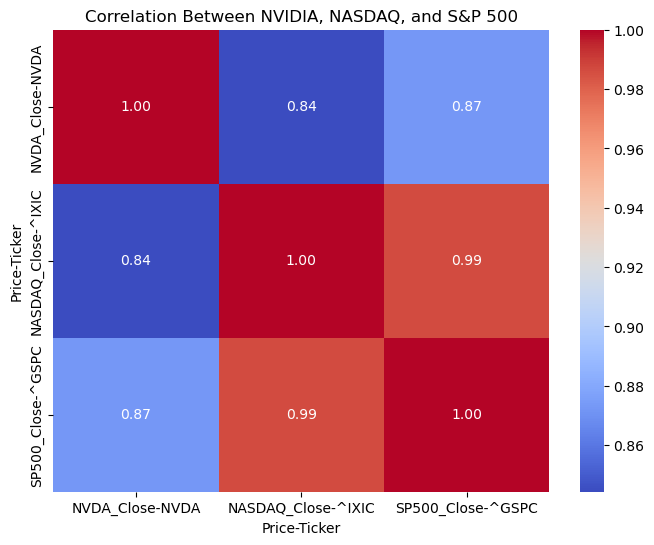

In [168]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between NVIDIA, NASDAQ, and S&P 500")
plt.show()


# What are the biggest one-day gains and losses in stock history? (Sort daily returns to find peaks and drops)

In [170]:
# If 'Date' is a column, convert it to a DateTime format and set it as index
nvda.reset_index(inplace=True)  # If 'Date' is already the index, this will prevent duplication
nvda['Date'] = pd.to_datetime(nvda['Date'])  # Ensure it's in datetime format
nvda.set_index('Date', inplace=True)  # Set 'Date' as index

# Check if the index is now set correctly
print(nvda.head())  # You should see 'Date' as the index


Price      NVDA_Close
Ticker           NVDA
Date                 
2015-01-02   0.483143
2015-01-05   0.474983
2015-01-06   0.460582
2015-01-07   0.459382
2015-01-08   0.476663


In [173]:
# Calculate daily percentage change (returns)
nvda['Daily_Return'] = nvda['NVDA_Close'].pct_change()

# Drop NaN values caused by the shift
nvda = nvda.dropna()


In [175]:
# Find the biggest one-day gain
max_gain = nvda['Daily_Return'].max()
max_gain_date = nvda[nvda['Daily_Return'] == max_gain].index[0]

# Find the biggest one-day loss
max_loss = nvda['Daily_Return'].min()
max_loss_date = nvda[nvda['Daily_Return'] == max_loss].index[0]

print(f"Biggest One-Day Gain: {max_gain:.2%} on {max_gain_date}")
print(f"Biggest One-Day Loss: {max_loss:.2%} on {max_loss_date}")


Biggest One-Day Gain: 29.81% on 2016-11-11 00:00:00
Biggest One-Day Loss: -18.76% on 2018-11-16 00:00:00


In [177]:
# Sort by biggest gains
top_gains = nvda.nlargest(5, 'Daily_Return')

# Sort by biggest losses
top_losses = nvda.nsmallest(5, 'Daily_Return')

print("Top 5 Biggest One-Day Gains:")
print(top_gains[['Daily_Return']])

print("\nTop 5 Biggest One-Day Losses:")
print(top_losses[['Daily_Return']])


Top 5 Biggest One-Day Gains:
Price      Daily_Return
Ticker                 
Date                   
2016-11-11     0.298067
2023-05-25     0.243696
2017-05-10     0.178259
2020-03-24     0.171564
2016-05-13     0.152094

Top 5 Biggest One-Day Losses:
Price      Daily_Return
Ticker                 
Date                   
2018-11-16    -0.187558
2020-03-16    -0.184521
2019-01-28    -0.138245
2020-03-12    -0.122368
2018-11-19    -0.119990


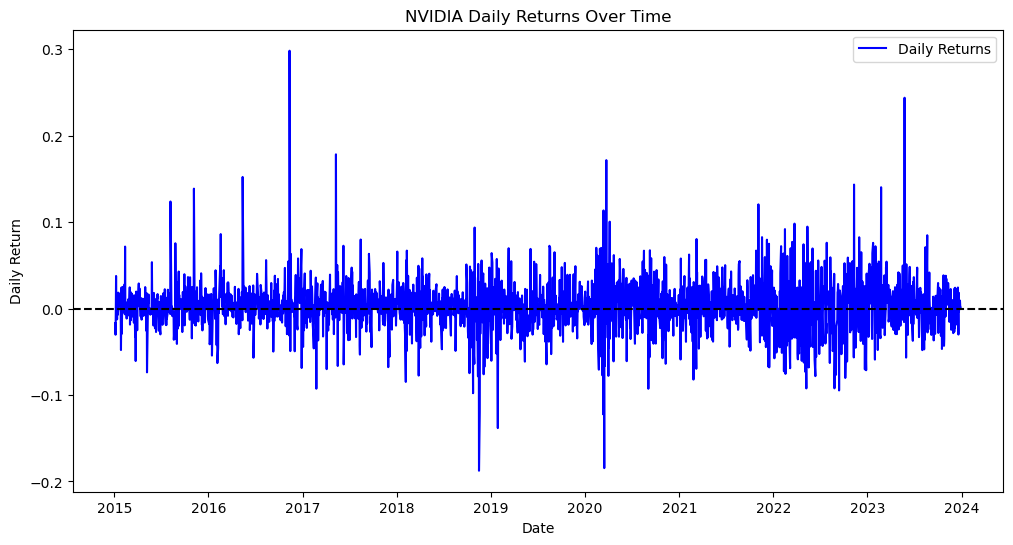

In [179]:
plt.figure(figsize=(12,6))
plt.plot(nvda.index, nvda['Daily_Return'], label="Daily Returns", color="blue")
plt.axhline(0, color='black', linestyle="--")
plt.title("NVIDIA Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()
